In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
import torch
import torch.nn as nn

In [2]:
df = pd.read_csv("dataset/train.csv")
df.describe()

Component1_fraction  Component2_fraction  Component3_fraction  \
count           2000.00000          2000.000000          2000.000000   
mean               0.18069             0.182910             0.179820   
std                0.16320             0.163704             0.166283   
min                0.00000             0.000000             0.000000   
25%                0.03000             0.040000             0.020000   
50%                0.14000             0.150000             0.140000   
75%                0.29000             0.300000             0.290000   
max                0.50000             0.500000             0.500000   

       Component4_fraction  Component5_fraction  Component1_Property1  \
count          2000.000000          2000.000000           2000.000000   
mean              0.342090             0.114490              0.000245   
std               0.141119             0.080219              0.999423   
min               0.010000             0.000000             -2.943737   
25%               0.220000             0.050000             -0.694658   
50%               0.350000             0.120000              0.011977   
75%               0.500000             0.180000              0.685717   
max               0.500000             0.290000              2.981146   

       Component2_Property1  Component3_Property1  Component4_Property1  \
count           2000.000000           2000.000000           2000.000000   
mean              -0.017319              0.001703             -0.004653   
std                1.006409              0.998859              1.006902   
min               -1.718895             -3.008683             -3.029468   
25%               -0.765154             -0.701948             -0.693361   
50%               -0.030235              0.021335              0.016774   
75%                0.653960              0.673125              0.659227   
max                3.051090              2.868901              2.982258   

       Component5_Property1  ...  BlendProperty1  BlendProperty2  \
count           2000.000000  ...     2000.000000     2000.000000   
mean              -0.018256  ...       -0.016879       -0.002076   
std                1.009294  ...        0.993787        1.004512   
min               -3.572440  ...       -2.550897       -3.079759   
25%               -0.713149  ...       -0.766128       -0.735109   
50%                0.194936  ...       -0.021089        0.001684   
75%                1.032029  ...        0.714763        0.723807   
max                1.032029  ...        2.856588        2.769156   

       BlendProperty3  BlendProperty4  BlendProperty5  BlendProperty6  \
count     2000.000000     2000.000000     2000.000000     2000.000000   
mean        -0.014351       -0.006068       -0.015249       -0.003497   
std          0.999360        1.009176        0.986480        1.009126   
min         -3.041624       -2.835701       -1.730111       -2.808210   
25%         -0.624235       -0.783547       -0.683165       -0.697379   
50%          0.146135       -0.028158       -0.250650       -0.011649   
75%          0.727597        0.664659        0.358701        0.695182   
max          1.638646        3.769643        3.600439        3.433292   

       BlendProperty7  BlendProperty8  BlendProperty9  BlendProperty10  
count     2000.000000     2000.000000     2000.000000      2000.000000  
mean        -0.013568       -0.017236       -0.001507        -0.001795  
std          1.000613        0.998759        1.001096         0.990433  
min         -2.994571       -3.621080       -3.292727        -2.476429  
25%         -0.622453       -0.725564       -0.702384        -0.733653  
50%          0.133470       -0.001548       -0.002604        -0.010459  
75%          0.704130        0.684894        0.706084         0.693839  
max          3.293228        3.340657        3.276199         2.708703  

[8 rows x 65 columns]

In [3]:
s = "BlendProperty1	BlendProperty2	BlendProperty3	BlendProperty4	BlendProperty5	BlendProperty6	BlendProperty7	BlendProperty8	BlendProperty9	BlendProperty10"
l = list(s.split("\t"))
data = df.drop(labels=l,axis = 1)
labels = df[l]

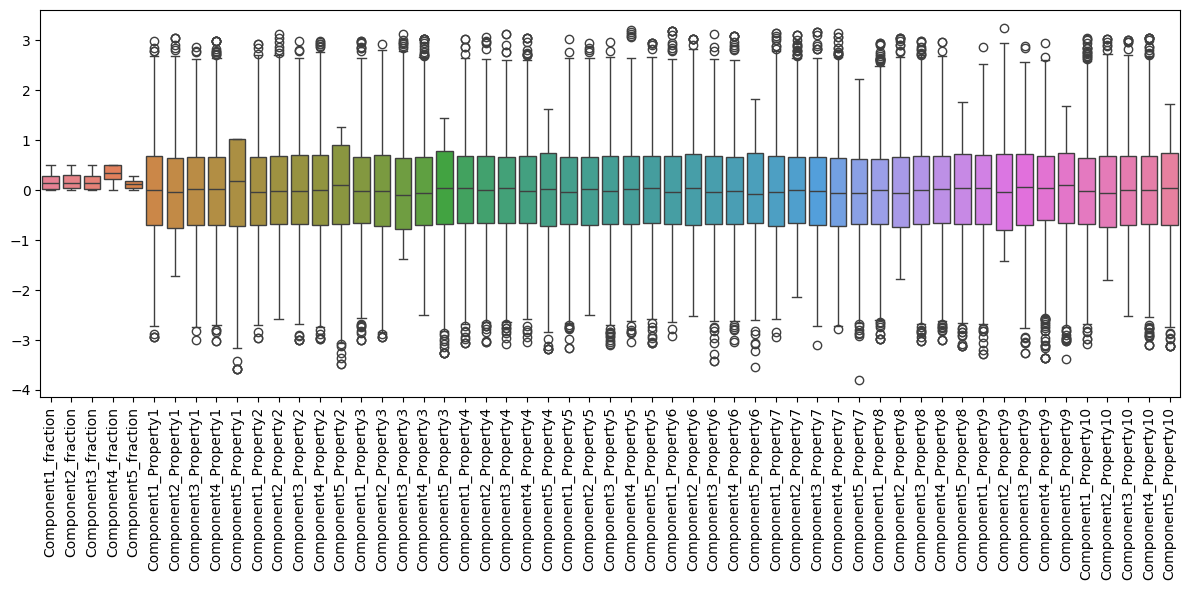

In [6]:
plt.figure(figsize=(12, 6))  # Set desired figure size
ax = sns.boxplot(data=data)
plt.xticks(rotation = 90)
plt.tight_layout()  # Optional: to ensure labels aren't cut off
plt.show()

In [11]:
filtered_df = df[(data <= 3).all(axis=1) & (data>=-3).all(axis = 1)]
filtered_df

Component1_fraction  Component2_fraction  Component3_fraction  \
1                    0.02                 0.33                 0.19   
3                    0.25                 0.42                 0.00   
4                    0.26                 0.16                 0.08   
6                    0.22                 0.00                 0.30   
7                    0.04                 0.06                 0.31   
...                   ...                  ...                  ...   
1995                 0.50                 0.12                 0.00   
1996                 0.19                 0.31                 0.00   
1997                 0.38                 0.06                 0.14   
1998                 0.50                 0.16                 0.00   
1999                 0.00                 0.34                 0.21   

      Component4_fraction  Component5_fraction  Component1_Property1  \
1                    0.46                 0.00             -0.224339   
3                    0.07                 0.26             -0.577734   
4                    0.50                 0.00              0.120415   
6                    0.26                 0.22             -1.370557   
7                    0.40                 0.19             -1.145412   
...                   ...                  ...                   ...   
1995                 0.26                 0.12              0.279523   
1996                 0.37                 0.13             -0.887185   
1997                 0.31                 0.11              0.568978   
1998                 0.18                 0.16             -0.067453   
1999                 0.45                 0.00              0.284090   

      Component2_Property1  Component3_Property1  Component4_Property1  \
1                 1.148036             -1.107840              0.149533   
3                -0.930826              0.815284              0.447514   
4                 0.666268             -0.626934              2.725357   
6                 0.343101             -0.151224              0.022085   
7                 1.341391              0.292412              0.254939   
...                    ...                   ...                   ...   
1995             -0.054170             -0.391227              0.400222   
1996              0.610050              0.178606              1.083154   
1997             -0.196759             -0.646318             -0.980070   
1998              0.321977             -0.137535              0.238507   
1999              0.189099             -0.831267             -1.084474   

      Component5_Property1  ...  BlendProperty1  BlendProperty2  \
1                -0.354000  ...       -1.257481       -1.475283   
3                 0.455717  ...       -0.066422        0.483730   
4                 0.392259  ...       -0.118913       -1.172398   
6                -1.087199  ...        0.844290        1.990310   
7                 0.004479  ...        1.801289        0.435323   
...                    ...  ...             ...             ...   
1995              1.032029  ...       -0.028366       -0.327297   
1996             -2.822749  ...       -0.449245        0.156778   
1997              1.032029  ...        0.029135        0.164890   
1998              0.017455  ...       -0.232960       -0.464947   
1999              0.845087  ...       -1.797180       -1.312212   

      BlendProperty3  BlendProperty4  BlendProperty5  BlendProperty6  \
1          -0.437385       -1.402911        0.147941       -1.143244   
3          -1.865442       -0.046295       -0.163820       -0.209693   
4           0.301785       -1.787407       -0.493361       -0.528049   
6           1.226777        1.386495        1.182153        1.271473   
7           1.196378        2.728603       -1.295891        2.099864   
...              ...             ...             ...             ...   
1995       -0.316933       -1.294092       -0.530259       -0.421526   
1996       -0.3674

In [12]:
df.shape

(2000, 65)

In [13]:
filtered_df.shape

(1821, 65)

### Regression models using sklearn 

In [14]:
filtered_X = filtered_df.drop(l,axis = 1)
filtered_y = filtered_df[l]

In [15]:
filtered_X.shape,filtered_y.shape

((1821, 55), (1821, 10))

In [28]:
from sklearn.model_selection import cross_val_score
def cross_val5(model):
    scores =  cross_val_score(model,filtered_X,filtered_y,cv = 5,scoring='neg_mean_absolute_percentage_error',n_jobs = -1)
    return np.mean(-scores)

##### RandomForest

In [24]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(filtered_X,filtered_y,test_size = 0.2)
rf1 = RandomForestRegressor()
rf1.fit(X_train,y_train)
rf1.score(X_test,y_test)

0.7090227930624751

In [25]:
cross_val5(rf1)

-3.312722428127482

##### GradientBoosting 

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
X_train,X_test,y_train,y_test = train_test_split(filtered_X,filtered_y,test_size = 0.2)
gr1 = GradientBoostingRegressor(n_iter_no_change=10)
multi_gr1 = MultiOutputRegressor(gr1)
multi_gr1.fit(X_train,y_train)
multi_gr1.score(X_test,y_test)

0.9343329051353646

In [34]:
cross_val5(multi_gr1)

1.409681481531898

#### Advanced Boosting techniques 

In [36]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 1.2 MB/s eta 0:01:25
   ---------------------------------------- 0.8/102.4 MB 1.2 MB/s eta 0:01:25
   ---------------------------------------- 1.0/102.4 MB 1.2 MB/s eta 0:01:23
    --------------------------------------- 1.3/102.4 MB 1.2 MB/s eta 0:01:22
    --------------------------------------- 1.6/102.4 MB 1.2 MB/s eta 0:01:22
    --------------------------------------- 1.8/102.4 MB 1.2 MB/s eta 0:01:22
    --------------------------------------- 2.1/102.4 MB 1.2 MB/s eta 0:01:23
    --------------------------------------- 2.4/102.4 MB 1.2 MB/s eta 0:01:22
   - -------------------------------------- 2.6/102.4 MB 1.2 MB/s eta 0:01:22
   - -------------------------------------- 2.9/102.4 MB 1.2 MB/s eta 0:01:22
   - -------------------------------------- 3.1/102.4 MB 1.2 MB/s eta 0:01:22



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [38]:
xgb1 = XGBRFRegressor(n_jobs  =-1)
xgb1.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [39]:
cross_val5(xgb1)

2.565157288483968

In [43]:
cat1 = CatBoostRegressor(loss_function='MAPE')
multi_cat1 =  MultiOutputRegressor(cat1)
cross_val5(multi_cat1)

1.10542309418078

In [45]:
lgb1 = LGBMRegressor(n_jobs=-1)
multi_lbg1 = MultiOutputRegressor(lgb1)

cross_val5(multi_lbg1)

1.2344471425003154

In [51]:
from sklearn.ensemble import AdaBoostRegressor

ada1 = AdaBoostRegressor(loss='linear')
multi_ada1 = MultiOutputRegressor(ada1,n_jobs=-1)
multi_ada1.fit(X_train,y_train)
multi_ada1.score(X_test,y_test)

0.8204849531496888

In [52]:
cross_val5(multi_ada1)

2.8594894257862076

In [63]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error

def objective(trial):
    params = {
        "boosting_type" : trial.suggest_categorical("boosting_type",['gbdt','dart']),
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3,log = True),
        "num_leaves": trial.suggest_int("num_leaves", 10, 200),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0,log = True),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0,log = True),
        "random_state": 42,
        "n_jobs": -1
    }

    kf =KFold(n_splits=5,shuffle=True,random_state = 42)
    cv_losses = []
    for train_idx, val_idx in kf.split(filtered_X):
        X_train,X_val = filtered_X.iloc[train_idx],filtered_X.iloc[val_idx]
        y_train,y_val = filtered_y.iloc[train_idx],filtered_y.iloc[val_idx]
        base_model = LGBMRegressor(**params)
        model = MultiOutputRegressor(base_model)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)

        loss = mean_absolute_percentage_error(y_val,preds)
        cv_losses.append(loss)

    return np.mean(cv_losses)
        

In [64]:
study = optuna.create_study(direction='minimize',sampler=TPESampler(seed = 42))
study.optimize(objective, n_trials=100)

[I 2025-07-15 20:23:06,495] A new study created in memory with name: no-name-a5564892-f8ec-45a1-89b1-2a2f0d1246d8


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12982
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 55
[LightGBM] [Info] Start training from score -0.027386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-07-15 20:24:56,082] Trial 0 finished with value: 1.4279788281306822 and parameters: {'boosting_type': 'dart', 'n_estimators': 233, 'learning_rate': 0.07661100707771368, 'num_leaves': 39, 'max_depth': 5, 'min_child_samples': 10, 'subsample': 0.9114125527116832, 'colsample_bytree': 0.7584442335012195}. Best is trial 0 with value: 1.4279788281306822.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12982
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 55
[LightGBM] [Info] Start training from score -0.027386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-07-15 20:25:59,051] Trial 1 finished with value: 1.518685038448551 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 293, 'learning_rate': 0.16967533607196555, 'num_leaves': 50, 'max_depth': 5, 'min_child_samples': 22, 'subsample': 0.6173849598677338, 'colsample_bytree': 0.7193453335958095}. Best is trial 0 with value: 1.4279788281306822.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12982
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 55
[LightGBM] [Info] Start training from score -0.027386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-07-15 20:29:08,739] Trial 4 finished with value: 1.2806963767131105 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 221, 'learning_rate': 0.044684675025045834, 'num_leaves': 33, 'max_depth': 9, 'min_child_samples': 8, 'subsample': 0.9390802805515328, 'colsample_bytree': 0.5982332410178471}. Best is trial 4 with value: 1.2806963767131105.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12982
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 55
[LightGBM] [Info] Start training from score -0.027386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-07-15 20:29:50,447] Trial 5 finished with value: 1.4387551893689001 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 180, 'learning_rate': 0.06420330336297862, 'num_leaves': 45, 'max_depth': 15, 'min_child_samples': 79, 'subsample': 0.9589310177971919, 'colsample_bytree': 0.9296936780589198}. Best is trial 4 with value: 1.2806963767131105.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12982
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 55
[LightGBM] [Info] Start training from score -0.027386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12982
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 55
[LightGBM] [Info] Start training from score -0.004787
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12982
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 55
[LightGBM] [Info] Start t

[I 2025-07-15 20:30:16,162] Trial 6 finished with value: 1.6181664334701722 and parameters: {'boosting_type': 'dart', 'n_estimators': 72, 'learning_rate': 0.01947558230629543, 'num_leaves': 18, 'max_depth': 7, 'min_child_samples': 42, 'subsample': 0.6034679394351627, 'colsample_bytree': 0.8880652023044383}. Best is trial 4 with value: 1.2806963767131105.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12982
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 55
[LightGBM] [Info] Start training from score -0.027386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-07-15 20:30:37,650] Trial 7 finished with value: 2.1793790564734445 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 186, 'learning_rate': 0.016149614799999188, 'num_leaves': 163, 'max_depth': 3, 'min_child_samples': 99, 'subsample': 0.8539625863739626, 'colsample_bytree': 0.5738381069006431}. Best is trial 4 with value: 1.2806963767131105.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12982
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 55
[LightGBM] [Info] Start training from score -0.027386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-07-15 20:31:20,528] Trial 8 finished with value: 1.5928700619888592 and parameters: {'boosting_type': 'dart', 'n_estimators': 227, 'learning_rate': 0.11935262708510537, 'num_leaves': 157, 'max_depth': 3, 'min_child_samples': 39, 'subsample': 0.5418138056165324, 'colsample_bytree': 0.9094734490278313}. Best is trial 4 with value: 1.2806963767131105.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12982
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 55
[LightGBM] [Info] Start training from score -0.027386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Exception ignored on calling ctypes callback function: <function _log_callback at 0x00000172EE76A840>
Traceback (most recent call last):
  File "C:\Users\Acer\Desktop\AI_ML\learning_project\env\Lib\site-packages\lightgbm\basic.py", line 287, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 


No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2025-07-15 20:31:36,660] Trial 9 finished with value: 1.744647776662654 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 65, 'learning_rate': 0.028797752657070342, 'num_leaves': 72, 'max_depth': 12, 'min_child_samples': 66, 'subsample': 0.9247996407871415, 'colsample_bytree': 0.6936188085716665}. Best is trial 4 with value: 1.2806963767131105.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12982
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 55
[LightGBM] [Info] Start training from score -0.027386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[W 2025-07-15 20:32:03,384] Trial 10 failed with parameters: {'boosting_type': 'gbdt', 'n_estimators': 121, 'learning_rate': 0.2704729722717779, 'num_leaves': 115, 'max_depth': 11, 'min_child_samples': 8, 'subsample': 0.7617774893432593, 'colsample_bytree': 0.5054111855744364} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\Acer\Desktop\AI_ML\learning_project\env\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\Acer\AppData\Local\Temp\ipykernel_19744\2672633378.py", line 27, in objective
    model.fit(X_train, y_train)
  File "C:\Users\Acer\Desktop\AI_ML\learning_project\env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\Desktop\AI_ML\learning_project\env\Lib\site-packages\sklearn\multioutput.py

KeyboardInterrupt: 

In [67]:
params1 = study.best_params

model = MultiOutputRegressor(LGBMRegressor(**params1))

In [68]:
X_train,X_test,y_train,y_test = train_test_split(filtered_X,filtered_y,test_size=0.2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12982
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 55
[LightGBM] [Info] Start training from score -0.035728
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12982
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 55
[LightGBM] [Info] Start training from score -0.019360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[L

0.9365925389733032

In [69]:
cross_val5(model)

1.3089838051330156

In [74]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
from catboost import CatBoostRegressor
import numpy as np

def catboost_objective(trial, X, y):
    params = {
        # Core parameters
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        
        # Regularization
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0, log=True),
        'model_size_reg': trial.suggest_float('model_size_reg', 0.0, 10.0),
        'rsm': trial.suggest_float('rsm', 0.1, 1.0),  # Feature subsampling
        
        # Optimization
        'loss_function': 'MAPE',
        'eval_metric': 'MAPE',
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        
        # Computational
        'thread_count': -1,
        'verbose': False,
        'random_seed': 42,
        'allow_writing_files': False
    }
    
    if params['grow_policy'] in ['Depthwise', 'Lossguide']:
        params['min_data_in_leaf'] = trial.suggest_int('min_data_in_leaf', 1, 50)
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = []
    
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
        model = MultiOutputRegressor(CatBoostRegressor(**params))
        model.fit(
            X_train, y_train,
            eval_set=(X_val, y_val),
            early_stopping_rounds=20,
            use_best_model=True,
            verbose=0
        )
        
        preds = model.predict(X_val)
        mape_score = mean_absolute_percentage_error(y_val, preds)
        cv_scores.append(mape_score)

            
    return np.mean(cv_scores)

def optimize_catboost(X, y, n_trials=100):
    study = optuna.create_study(
        direction='minimize',
        sampler=TPESampler(seed=42),
        pruner=optuna.pruners.MedianPruner(n_startup_trials=10)  # Changed from n_warmup
    )
    
    study.optimize(
        lambda trial: catboost_objective(trial, X, y),
        n_trials=n_trials,
        show_progress_bar=True
    )
    
    print(f"Best MAPE: {study.best_value:.4f}")
    print("Best params:")
    for k, v in study.best_params.items():
        print(f"{k:>20}: {v}")
    
    return study.best_params

# Example usage with DataFrame conversion:
if __name__ == "__main__":
    from sklearn.datasets import make_regression
    import pandas as pd
    
    # Run optimization
    best_params = optimize_catboost(filtered_X, filtered_y, n_trials=50)

[I 2025-07-15 20:46:22,099] A new study created in memory with name: no-name-640956e6-f725-42d9-b773-2a50a761125b


  0%|          | 0/50 [00:00<?, ?it/s]

[W 2025-07-15 20:46:22,206] Trial 0 failed with parameters: {'iterations': 437, 'learning_rate': 0.24517932047070642, 'depth': 9, 'l2_leaf_reg': 0.0024430162614261413, 'model_size_reg': 1.5601864044243652, 'rsm': 0.2403950683025824, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 36} because of the following error: CatBoostError('catboost/private/libs/target/data_providers.cpp:639: Currently only multi-regression, multilabel and survival objectives work with multidimensional target').
Traceback (most recent call last):
  File "C:\Users\Acer\Desktop\AI_ML\learning_project\env\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\Acer\AppData\Local\Temp\ipykernel_19744\2864625152.py", line 66, in <lambda>
    lambda trial: catboost_objective(trial, X, y),
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\AppData\Local\Temp\ipykernel_19744\2864625152.py", line 43, in 

CatBoostError: catboost/private/libs/target/data_providers.cpp:639: Currently only multi-regression, multilabel and survival objectives work with multidimensional target

#### feature engineering